In [268]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [270]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [271]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [272]:
print(f"Number of training examples: {train_set_x_orig.shape[0]}")
print ("shape of training examples: " + str(train_set_x_orig.shape))
print ("shape of training labels: " + str(train_set_y.shape))
print ("shape of test examples: " + str(test_set_x_orig.shape))
print(f"Number of test examples: {test_set_x_orig.shape[0]}")

Number of training examples: 209
shape of training examples: (209, 64, 64, 3)
shape of training labels: (1, 209)
shape of test examples: (50, 64, 64, 3)
Number of test examples: 50


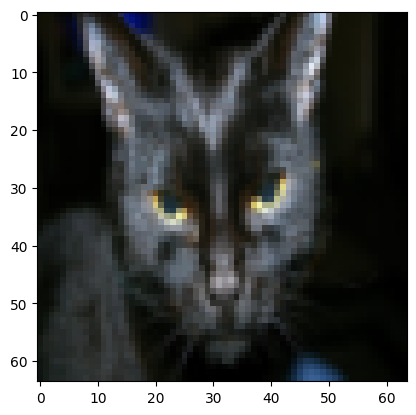

In [273]:
plt.imshow(train_set_x_orig[25])

In [274]:
# Flattened each image and transpose it so that each column represents a flattened image

train_set_x_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten =test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


In [275]:
print ("shape of training examples: " + str(train_set_x_flatten.shape))
print ("shape of training labels: " + str(train_set_y.shape))

shape of training examples: (12288, 209)
shape of training labels: (1, 209)


In [276]:
# normalize each image using a scale factor of 255

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

print ("shape of training examples: " + str(train_set_x.shape))

shape of training examples: (12288, 209)


In [277]:
from LogisticRegression import LogisticRegression


model = LogisticRegression(max_iter=2000)

In [278]:
costs = model.fit(test_set_x, test_set_y)

In [279]:
y_prediction = model.predict(test_set_x)

In [280]:
model.score(test_set_x, test_set_y)

1.0

In [281]:
model.accuracy(test_set_y, y_prediction)

1.0

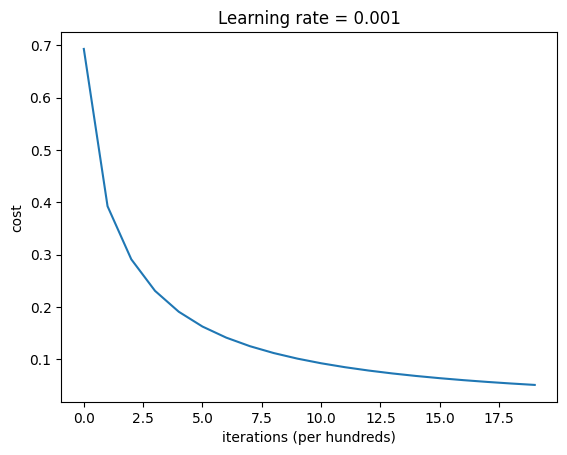

In [282]:
costs_per_100_iter = np.squeeze(model.costs)

plt.plot(costs_per_100_iter)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate = {model.lr}")
plt.show()